# 2007 Delayed flights EDA
## by Ximin Juan

## Investigation Overview

> This analysis is aiming to investigate on **Month**, **DayOfWeek**, **CRSDepTime**, **CRSArrTime**, **UniqueCarrier**, **Origin**, **Dest**, **Distance**, **Cancelled**, **CancellationCode** and other delay variables. <br>
In this dataset, I would look into: 
> - causes of delay and cancellation and their distribution
> - zoom in relationship between delay and other variables - categorical/numeric

## Dataset Overview

> The dataset originally has 7453215 queries, yet due to data size, a sample with 745321 rows (flight records) and 18 columns has been selected. The majority is numeric values, focusing on 2 consequences - cancellation, delay (arrival and depature), depicting 5 main causes with them measured in minutes. Moreover, this dataset also has other categorical variables such as carrier, origin, destination and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2007.csv',
 'Flight delay EDA-Slide.ipynb',
 'Flight delay EDA.html',
 'Flight delay EDA.ipynb',
 'Flight_delay_EDA_SlideShow.ipynb',
 'Flight_delay_EDA_SlideShow.slides.html',
 'output_toggle.tpl',
 'readme.md',
 'slide_deck_template.ipynb']

In [3]:
df = pd.read_csv('2007.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [5]:
# only use 10% of the data, as the dataset is too big, jupyter runs extremely slowly
df = df.sample(745321, replace=False)

In [6]:
# DepTime and CRSDep Time are mainly used to calculate DepDelay, therefore will drop DepTime
# The same reason applies to ArrTime
# FlightNum is a unique identifier for the flight, therefore TailNum will be dropped
# ElapsedTime will not be used in this analysis, will be dropped
# AirTime and Distance are seen highly related, Distance will be dropped
# Taxiing will not be used in this analysis, will be dropped
# diverted will not be used in this analysis, will be dropped
df.drop(['Year','DayofMonth','DepTime','ArrTime','TailNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut', 'Diverted'], axis=1, inplace=True)

In [7]:
# now we have a smaller picture of flight dataset
df.head()

,Month,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1891016,4,6,1835,2015,WN,503,-14.0,-3.0,STL,DAL,546,0,NaN,0,0,0,0,0
2242876,4,7,654,829,MQ,4365,-23.0,-7.0,OMA,ORD,416,0,NaN,0,0,0,0,0
701255,2,2,1805,1925,WN,1023,-1.0,3.0,BWI,CMH,336,0,NaN,0,0,0,0,0
3922910,7,7,1100,1155,OO,3927,-6.0,-1.0,SLC,SBP,608,0,NaN,0,0,0,0,0
121530,1,2,1940,2058,XE,2919,-7.0,-9.0,IAH,BRO,308,0,NaN,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745321 entries, 1891016 to 2228857
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              745321 non-null  int64  
 1   DayOfWeek          745321 non-null  int64  
 2   CRSDepTime         745321 non-null  int64  
 3   CRSArrTime         745321 non-null  int64  
 4   UniqueCarrier      745321 non-null  object 
 5   FlightNum          745321 non-null  int64  
 6   ArrDelay           727453 non-null  float64
 7   DepDelay           729104 non-null  float64
 8   Origin             745321 non-null  object 
 9   Dest               745321 non-null  object 
 10  Distance           745321 non-null  int64  
 11  Cancelled          745321 non-null  int64  
 12  CancellationCode   16217 non-null   object 
 13  CarrierDelay       745321 non-null  int64  
 14  WeatherDelay       745321 non-null  int64  
 15  NASDelay           745321 non-null  int64  


In [9]:
df.describe()

,Month,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,745321.000000,745321.000000,745321.000000,745321.000000,745321.000000,727453.000000,729104.000000,745321.000000,745321.000000,745321.000000,745321.000000,745321.000000,745321.000000,745321.000000
mean,6.514543,3.936021,1329.718099,1494.702613,2188.705662,10.225879,11.435786,720.015764,0.021758,3.886304,0.788631,3.783234,0.023323,5.100901
std,3.424112,1.991719,465.011372,481.746978,1972.112029,39.643753,36.462558,561.938320,0.145894,21.159086,10.229971,16.093278,1.049699,21.282153
min,1.000000,1.000000,5.000000,1.000000,1.000000,-175.000000,-165.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,927.000000,1115.000000,591.000000,-9.000000,-4.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,1320.000000,1518.000000,1509.000000,0.000000,0.000000,569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,1720.000000,1906.000000,3550.000000,14.000000,11.000000,946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,7.000000,2359.000000,2400.000000,9601.000000,1665.000000,1689.000000,4962.000000,1.000000,1665.000000,1070.000000,802.000000,357.000000,714.000000


## Data Wrangling

In [10]:
# check if any duplicated value
df.duplicated().sum()

332

In [11]:
# as these are duplicated rows but a very small number, therefore these 27 rows will be dropped
df_duplicated = df[df.duplicated()].index
df_duplicated

Int64Index([3874303,  451852, 2623232, 5778466, 1915343,  316384,  651441,
            3029031, 2155728, 5465481,
            ...
            3337128, 4878238, 1113149, 6105599,  419542, 6632337,  643913,
            2864125, 1398185, 3753359],
           dtype='int64', length=332)

In [12]:
df.drop(df_duplicated, axis=0, inplace=True)

In [13]:
# check if duplicated rows are still in dataset
df.index.isin(df_duplicated).sum()

0

In [14]:
# if any null columns
df.isnull().sum()

Month                     0
DayOfWeek                 0
CRSDepTime                0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ArrDelay              17801
DepDelay              16150
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode     728839
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

> Non unreasonable null columns.

In [15]:
# check if cancellations all has codes
df[df['Cancelled'] == 1]['CancellationCode'].isnull().sum()

0

> All cancellations have a reason.

In [16]:
# convert date to timestamp
df['Month']= pd.to_datetime(df['Month'], format = '%m').dt.month

In [17]:
# adjust all time to proper format
df[['CRSDepTime', 'CRSArrTime']] = df[['CRSDepTime', 'CRSArrTime']].applymap(lambda x: str(x).zfill(4))

In [18]:
type(df['CRSDepTime'].iloc[1])

str

In [19]:
# I will categorize scheduled depature/arrival time so as to use them as categorical variables instead of using wide time range
bins_edge = [-0.5, 5, 12, 17, 21, 24]
bins_label = ['Night_0','Morning','Afternoon','Evening', 'Night']
df['CRSDep_Category'] = pd.cut(df['CRSDepTime'].str[:2].astype('int64'), bins = bins_edge, labels = bins_label)
df['CRSArr_Category'] = pd.cut(df['CRSArrTime'].str[:2].astype('int64'), bins = bins_edge, labels = bins_label)

df['CRSDep_Category'] = df['CRSDep_Category'].apply(lambda x: x.replace('_0', ''))
df['CRSArr_Category'] = df['CRSArr_Category'].apply(lambda x: x.replace('_0', ''))

In [20]:
# create 2 columns categorize departure delay and arrival delay
# departure delay
df['DepDelay_cat'] = df['DepDelay']>=15
df['DepDelay_cat'] = pd.get_dummies(df['DepDelay_cat'], drop_first=True)

# arrival delay
df['ArrDelay_cat'] = df['ArrDelay']>=15
df['ArrDelay_cat'] = pd.get_dummies(df['ArrDelay_cat'], drop_first=True)

In [21]:
print('Dataset after wrangling')
df.head(5)

Dataset after wrangling


,Month,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,...,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDep_Category,CRSArr_Category,DepDelay_cat,ArrDelay_cat
1891016,4,6,1835,2015,WN,503,-14.0,-3.0,STL,DAL,...,NaN,0,0,0,0,0,Evening,Evening,0,0
2242876,4,7,0654,0829,MQ,4365,-23.0,-7.0,OMA,ORD,...,NaN,0,0,0,0,0,Morning,Morning,0,0
701255,2,2,1805,1925,WN,1023,-1.0,3.0,BWI,CMH,...,NaN,0,0,0,0,0,Evening,Evening,0,0
3922910,7,7,1100,1155,OO,3927,-6.0,-1.0,SLC,SBP,...,NaN,0,0,0,0,0,Morning,Morning,0,0
121530,1,2,1940,2058,XE,2919,-7.0,-9.0,IAH,BRO,...,NaN,0,0,0,0,0,Evening,Evening,0,0


### What is the structure of your dataset?

> The dataset has 745321 rows (flight records) and 18 columns. The majority is numeric values, focusing on 2 consequences - cancellation, delay (arrival and depature), depicting 5 main causes with them measured in minutes. Moreover, this dataset also has other categorical variables such as carrier, origin, destination and so on.
### What is/are the main feature(s) of interest in your dataset?

> Considering the dataset is quite targetting at factors that impact flights'deviation from plan (delay/cancellation), I would be interested in:
> - causes of delay and cancellation and their distribution
> - zoom in other variables - categorical/numeric and see the relationship between them and delay?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Overall, I would investigate on **Month**, **DayOfWeek**, **CRSDepTime**, **CRSArrTime**, **UniqueCarrier**, **Origin**, **Dest**, **Distance**, **Cancelled**, **CancellationCode** and other delay variables. By looking at above dataset, I would expect: 
> - for flights departing at a certain time range has the most delays in departure, same with arriving time.
> - flight delay are mostly caused by carrier control, cancellation would be due to weather.
> - distance could also be a factor that impact flight's punctuality.

## Univariate Exploration

## Distribution of delays

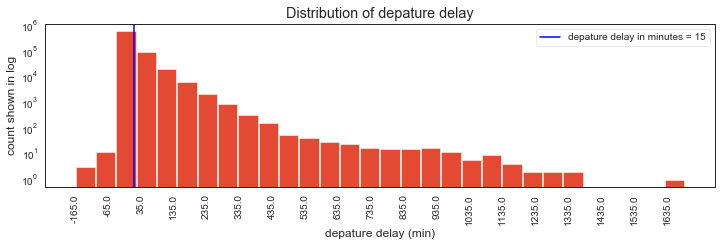

In [22]:
# set plot style
plt.style.use('ggplot')
sb.set_style('white')

# visualize
min_dep = df['DepDelay'].value_counts().index.min()
max_dep = df['DepDelay'].value_counts().index.max()
labels_dep = np.arange(min_dep, max_dep, 100)
plt.figure(figsize=(12,3))
plt.tight_layout(pad=0.5)
plt.hist(data=df, x='DepDelay',bins=30, rwidth=0.95)
plt.yscale('log')
plt.xlabel('depature delay (min)')

# adding 15 min delay point
plt.axvline(x=15, color='b', label='depature delay in minutes = 15')
plt.xticks(labels_dep, labels_dep, rotation=90)
plt.legend()
plt.ylabel('count shown in log')
plt.title('Distribution of depature delay');

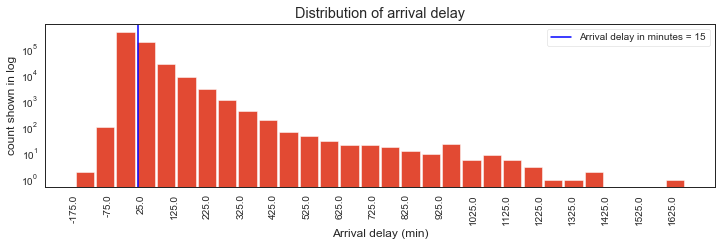

In [23]:
# visualize
min_arr = df['ArrDelay'].value_counts().index.min()
max_arr = df['ArrDelay'].value_counts().index.max()
labels_arr = np.arange(min_arr, max_arr, 100)

plt.figure(figsize=(12,3))
plt.hist(data=df, x='ArrDelay',bins=30, rwidth=0.9)
plt.yscale('log')
plt.xlabel('Arrival delay (min)')

# adding 15 min delay point
plt.axvline(x=15, color='b', label='Arrival delay in minutes = 15')
plt.xticks(labels_arr, labels_arr, rotation=90)
plt.legend()
plt.ylabel('count shown in log')
plt.title('Distribution of arrival delay');

Plots above show distribution of recorded depature delay and arrival delay in 2007. <br>
In general, the distribution shape of depature delay and arrival delay are quite similar (right skewed), having both negative minutes (meaning earlier than scheduled) and positive minutes (real delay). <br>
For depature delay, range is from -305 to 1395 minutes (some extreme cases at more than 1395), while for arrival delay, range is from -312 to 1388 (some extreme cases > 1388). The shape probably implies if flight is delayed in depature, it usually delays in arrival. For both of them, the peak of delayed time is below 100 minutes.

## Distribution of cancellations and cancelled reasons

Cancelled flights are 2.17% of total flights in 2007


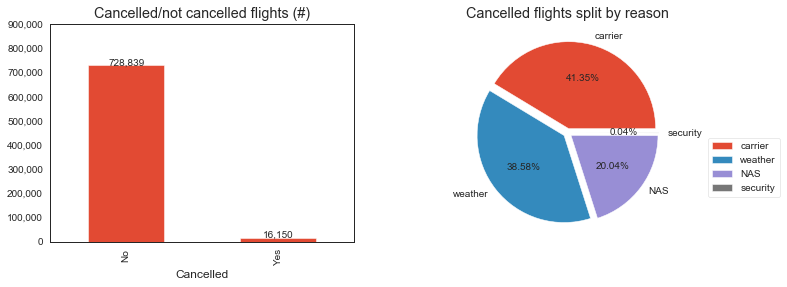

In [24]:
plt.figure(figsize=(12,4))
b_color = sb.color_palette()[0]

# bar plot on the left
plt.subplot(1,2,1)
by_cancel = df.groupby(['Cancelled'])['FlightNum'].count()
by_cancel.plot(kind='bar')
y_ticks = np.arange(0, 1000000, 100000)
y_ticks_label = ['{:,}'.format(i) for i in y_ticks]
plt.yticks(y_ticks, y_ticks_label)
plt.xticks([0, 1],['No', 'Yes'])
plt.title('Cancelled/not cancelled flights (#)')
# annotation
for a in [0, 1]:
    label = by_cancel.values[a]
    label_shown = '{:,}'.format(label)
    plt.text(a, label, label_shown,ha='center')

# pie chart on the right
plt.subplot(1,2,2)
cancelled = pd.DataFrame(df[df['Cancelled'] == 1]['CancellationCode'].value_counts())
cancelled['perc'] = cancelled['CancellationCode']/cancelled['CancellationCode'].sum()
label_pie = ['carrier', 'weather', 'NAS', 'security']
plt.pie(x='perc', autopct='%.2f%%', explode=[0.05] * 4, labels=label_pie, data=cancelled)
plt.legend(loc=1, bbox_to_anchor = (1.5, 0.5))
plt.title('Cancelled flights split by reason')
print('Cancelled flights are {:.2f}% of total flights in 2007'.format(by_cancel[1]/by_cancel.sum() * 100));

Plots above show cancelled flights are 2.15% of total in 2007, the biggest reason is carrier control (41.95%), the second is weather (38.05%), followed by NAS (19.96%) and a small portion is security (0.04%). Carrier control is the biggest reason, which is surprising, probably it is also the biggest reason of delay.

## Distribubion of flights in scheduled time ranges

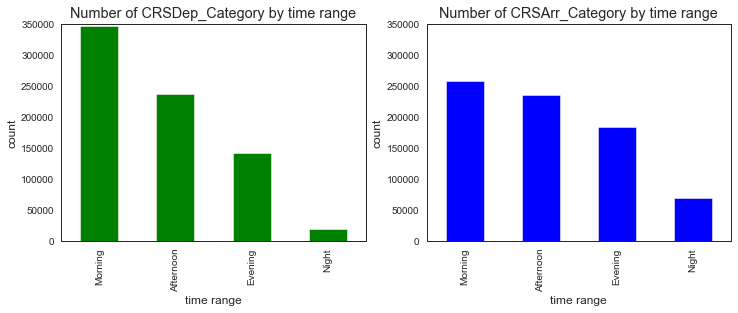

In [25]:
# plot function
def time_range_bar(col, color='Blue'):
    col.value_counts().plot(kind='bar', color=color)
    plt.xlabel('time range')
    plt.title('Number of {:s} by time range'.format(col.name))
    plt.ylabel('count')

# bar chart scheduled departure time range
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
time_range_bar(df['CRSDep_Category'], color='Green')
plt.ylim(0, 350000)
# bar chart scheduled arrival time range
plt.subplot(1,2,2)
time_range_bar(df['CRSArr_Category'])
plt.ylim(0, 350000);     

Plots above show that morning is the most busy time range for both scheduled depature and arrival, followed by afternoon, evening and night. <br>
In terms of scheduled depature and scheduled arrival, morning has more scheduled departures than arrivals, the same as evening and night, afternoon are quite equal in both categories.

## Distribution of flights by top 10 origins and dests

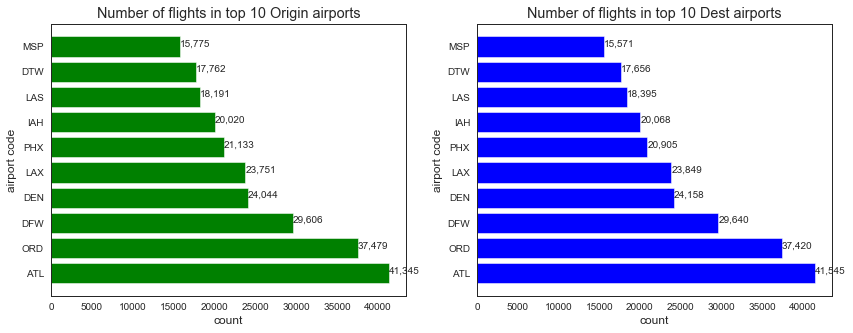

In [26]:
# plot function
def origin_dest_bar(col, color='Blue'):  
    y = col.value_counts(ascending=False).head(10).index
    width = col.value_counts(ascending=False).head(10).values
    plt.barh(y = y, width = width, color=color)
    plt.title('Number of flights in top 10 {:s} airports'.format(col.name))
    plt.ylabel('airport code')
    plt.xlabel('count')
    # annotate
    for i in np.arange(0, y.shape[0], 1):
        plt.text(width[i], i, '{:,}'.format(width[i]))
        
# origin plot
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
origin_dest_bar(df['Origin'], color='Green')
# destination plot
plt.subplot(1, 2, 2)
origin_dest_bar(df['Dest'])

Plots above show that top 10 origins are also the top 10 destinations with exactly same order.

## Delay causes
There are 5 causes of flight delays, I would like to take a look of the frequency and average delayed time of these causes. <br>

Delayed flights are 27.44% of total flights in 2007


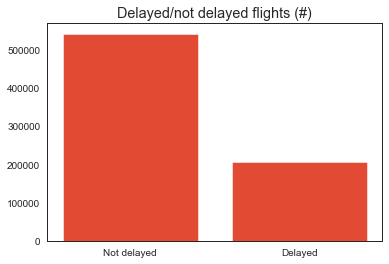

In [27]:
# visualize delayed and not delayed flights
delayed = df[(df['DepDelay_cat'] == 1) | (df['ArrDelay_cat'] == 1)]['FlightNum'].count()
not_delayed = df[(df['DepDelay_cat'] == 0) & (df['ArrDelay_cat'] == 0)]['FlightNum'].count()
x = [1, 2]
xlabel = ['Not delayed', 'Delayed']
y = [not_delayed, delayed]
plt.bar(x, y)
plt.xticks(ticks = x, labels = xlabel)
print('Delayed flights are {:.2f}% of total flights in 2007'.format(delayed/df.shape[0] * 100))
plt.title('Delayed/not delayed flights (#)');

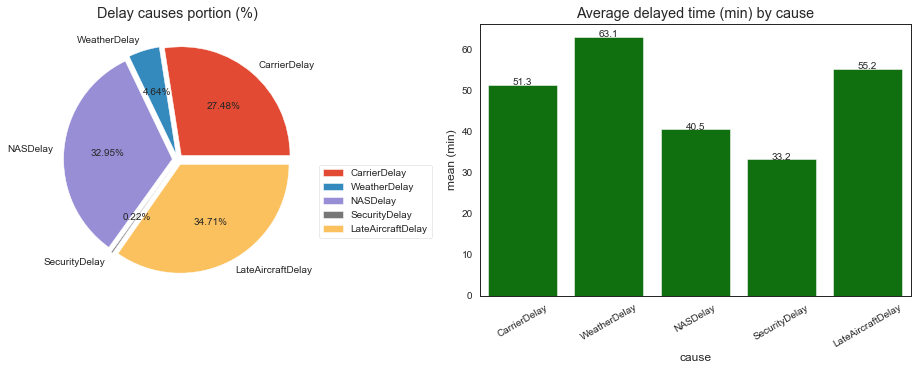

In [28]:
# calculation for plots
counts = []
causes = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
for i in causes:
    count = sum(df[i] >=15)
    counts.append(count)

perc = [i/sum(counts) for i in counts]

# plot different causes in percent
df_cause = pd.DataFrame({'cause': causes, 'perc': perc})
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.pie(x='perc', autopct='%.2f%%', explode=[0.05] * 5, labels='cause', data=df_cause)
plt.title('Delay causes portion (%)')
plt.legend(loc=0, bbox_to_anchor = (1, 0.5))

# mean of each cause
means = []
for i in causes:
    mean = df[df[i] >=15][i].mean()
    means.append(mean)

df_cause_mean = pd.DataFrame({'cause': causes, 'mean': means})

# plot mean delayed time by cause
plt.subplot(1,2,2)
sb.barplot(data=df_cause_mean, x='cause', y='mean', color='Green')
plt.xticks(rotation=30)
plt.ylabel('mean (min)')
plt.title('Average delayed time (min) by cause')
for i in np.arange(0, len(causes)):
    plt.text(i, means[i], '{:.1f}'.format(means[i]), ha='center')

Plots above show both number of delays in different causes and their average impact (minutes). From the pie chart we can find late aircraft (35%) cause most of delay cases, which is surprising, followed by NAS delay (33%) and carrier delay (27%). Weather delay is just a small portion (5%). However, in terms of impact (minutes), weather delay is usually very long (62 minutes).

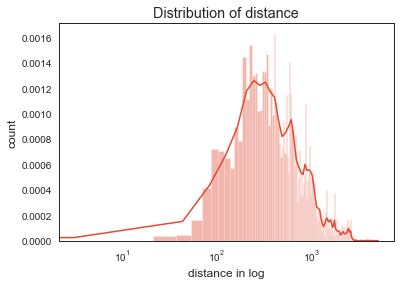

In [29]:
# distribution plot of distance
sb.distplot(df['Distance'], bins=300)
plt.xscale('log')
plt.title('Distribution of distance')
plt.xlabel('distance in log')
plt.ylabel('count');

As there is a long tail in distance, I've transformed x scale to log, then I can see this plot is close to a normal distribution with center at 337.

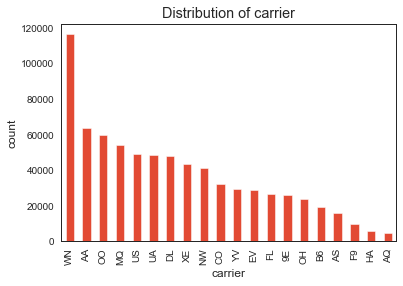

In [30]:
# distribution plot of carrier
df['UniqueCarrier'].value_counts().plot(kind='bar')
plt.title('Distribution of carrier')
plt.xlabel('carrier')
plt.ylabel('count');

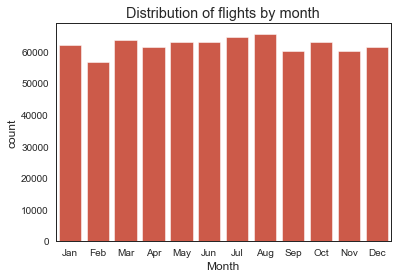

In [31]:
# distribution of flights by month
basecolor = sb.color_palette()[0]
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sb.countplot(data=df, x='Month', color=basecolor)
plt.title('Distribution of flights by month')
plt.xticks(ticks=np.arange(0, 12, 1), labels=month);

Above plot shows that in terms of number of flights, Jul and Aug are the biggest 2 months, while Feb has the smallest number, the other months are similar. We could observe if there's a difference in flight delays.

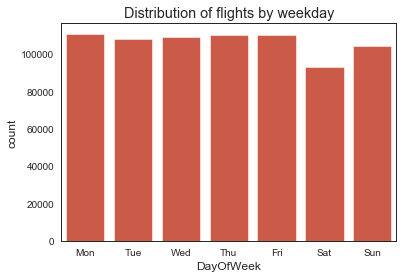

In [32]:
# distribution of flights by weekday
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' , 'Sun']
sb.countplot(data=df, x='DayOfWeek', color=basecolor)
plt.title('Distribution of flights by weekday')
plt.xticks(ticks=np.arange(0, 7, 1), labels=weekday);

I can observe that Saturday and Sunday have relatively small number of flights.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For some of the variables, I've transformed x or y scale to log, due to long tail, while distributing distance and delay minutes, overall the shape is more clear.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some outliers are identified especially in arrival delay and depature delay. For scheduled departure/arrival time, to clearly compare the trend, they have been categorized.

## Bivariate Exploration

## Correlation among all numeric variables

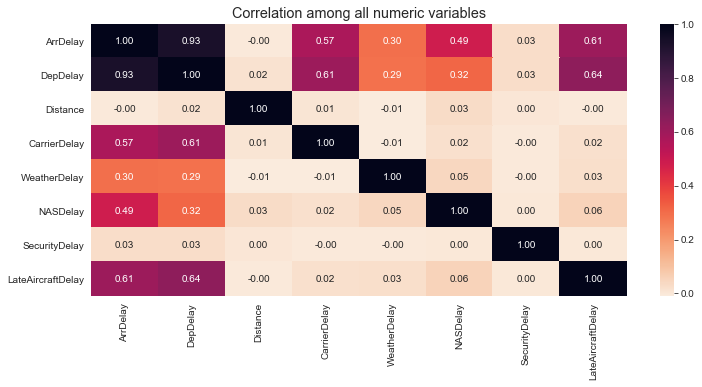

In [33]:
# calculate and plot corr between arrdelay and depature delay
plt.figure(figsize=(12,5))
sb.heatmap(df[['ArrDelay','DepDelay','Distance', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].corr(), annot=True, fmt='.2f', cmap='rocket_r')
plt.title('Correlation among all numeric variables');

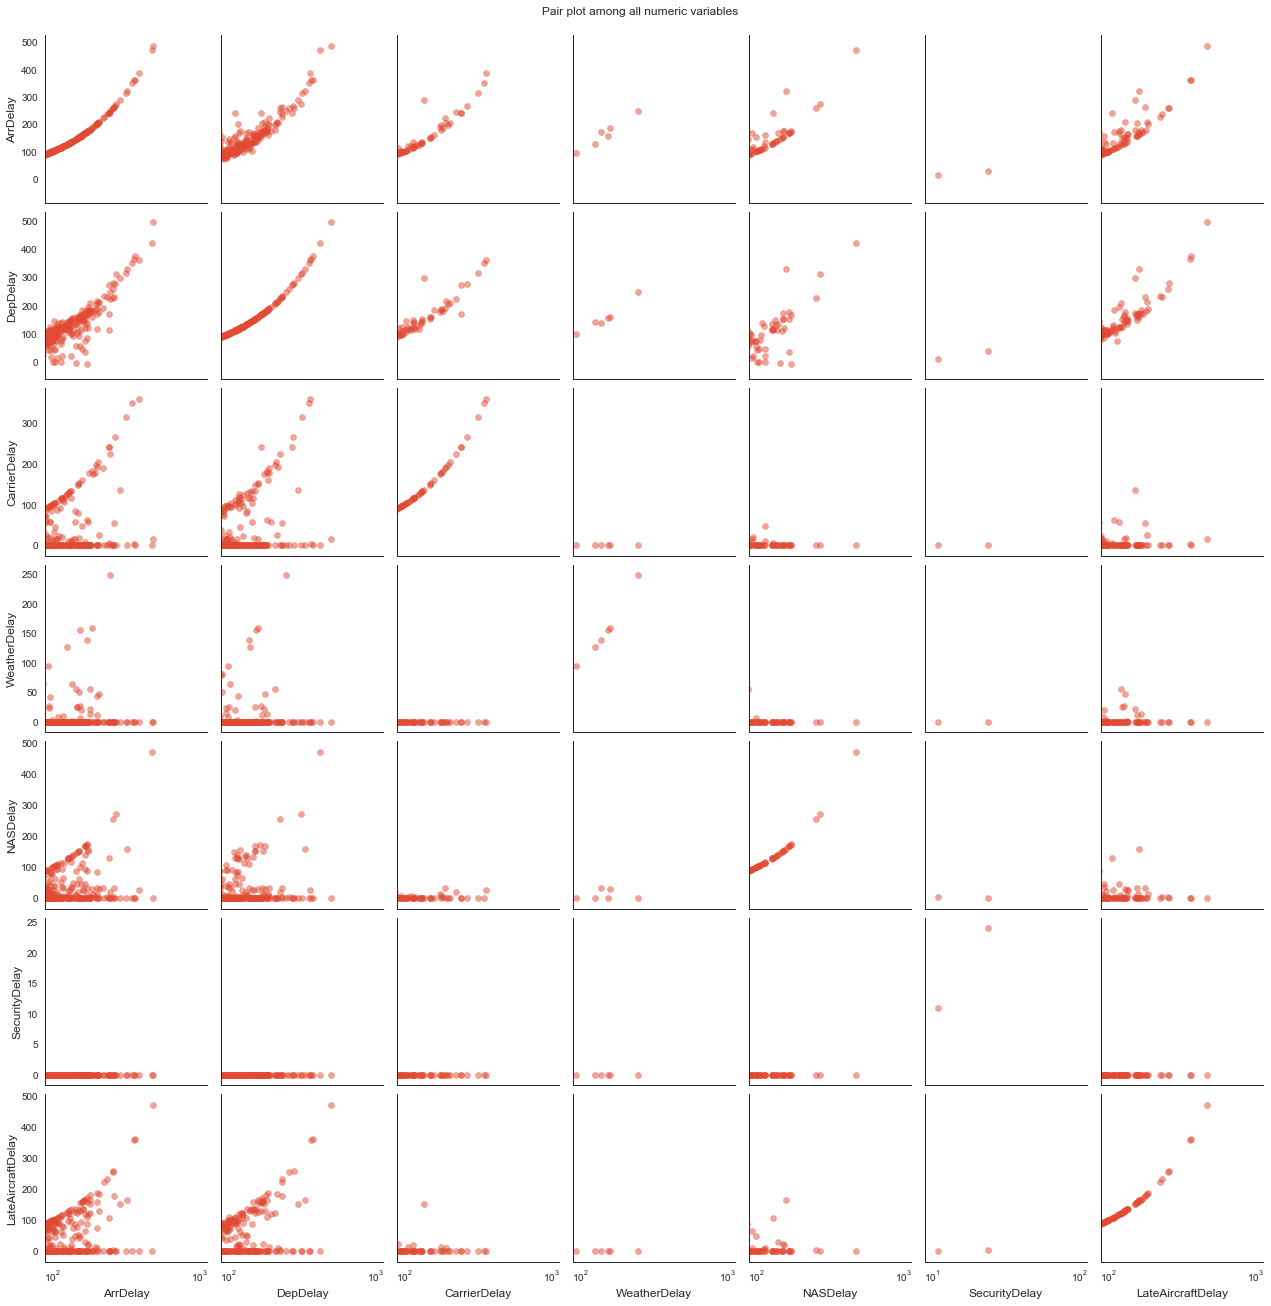

In [34]:
# relationship for all numeric variables
sample_size = 5000
sample_delay = df.sample(sample_size, replace=False)
g = sb.PairGrid(data=sample_delay,vars=['ArrDelay','DepDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay'])
g.map(plt.scatter, alpha=0.5)
g.set(xscale='log')
g.fig.suptitle('Pair plot among all numeric variables',y=1.02);

I was expecting there could be a relationship between distance and any of the delay variables, as it's logical that long distance is related to more delay due to uncertainty on the tour. However, there's no strong relationship observed. <br>
For arrival delay and departure delay, they are strongly correlated. <br>
With regard to other five causes, we could potentially find: <br>
- CarrierDelay is more related to ArrDelay (0.57).
- WeatherDelay is equally related to both ArrDelay and DepDelay (0.29).
- NASDelay is more related to ArrDelay (0.49), weakly related to DepDelay (0.32).
- SecurityDelay is surprisingly weakly related to both ArrDelay and DepDelay.
- LateAircraftDelay is similarly related to ArrDelay (0.61) and DepDelay (0.65).

## Categorical variables

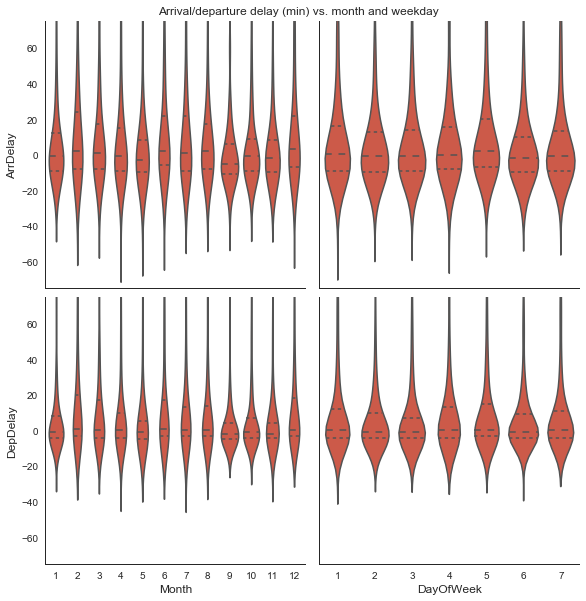

In [35]:
# plot between categorical variables and arrival/departure delay
basecolor = sb.color_palette()[0]
g = sb.PairGrid(data=sample_delay, x_vars=['Month', 'DayOfWeek'], y_vars=['ArrDelay','DepDelay'], height=4)
g.map(sb.violinplot, inner='quartile',color=basecolor)
g.set(ylim=(-75,75));
g.fig.suptitle('Arrival/departure delay (min) vs. month and weekday', y=1.02);

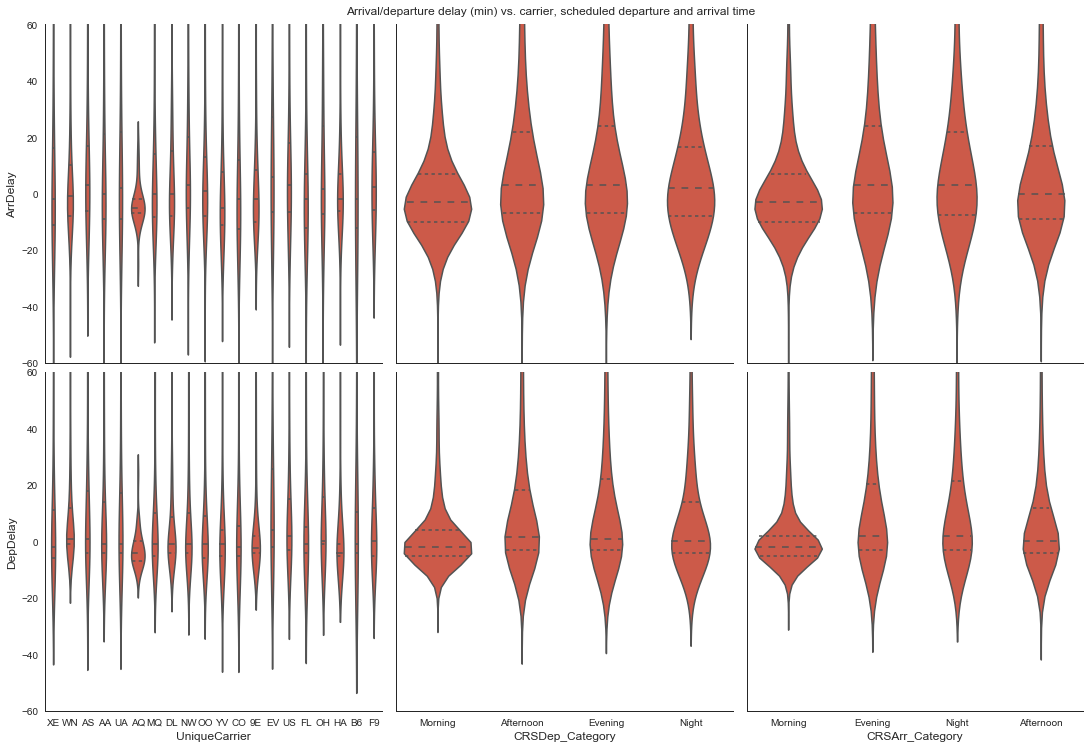

In [36]:
g = sb.PairGrid(data=sample_delay, x_vars=['UniqueCarrier', 'CRSDep_Category','CRSArr_Category'], y_vars=['ArrDelay','DepDelay'], height=5)
g.map(sb.violinplot, inner='quartile',color=basecolor)
g.set(ylim=(-60,60))
g.fig.suptitle('Arrival/departure delay (min) vs. carrier, scheduled departure and arrival time', y=1.02);

Look at above plots, it seems ArrDelay and DepDelay have similar pattern among all categorical variables. However, due to sample size, and the majority of flights are not delayed, therefore I wil look into each variable further.<br>

## Interaction between categorical and numeric variables

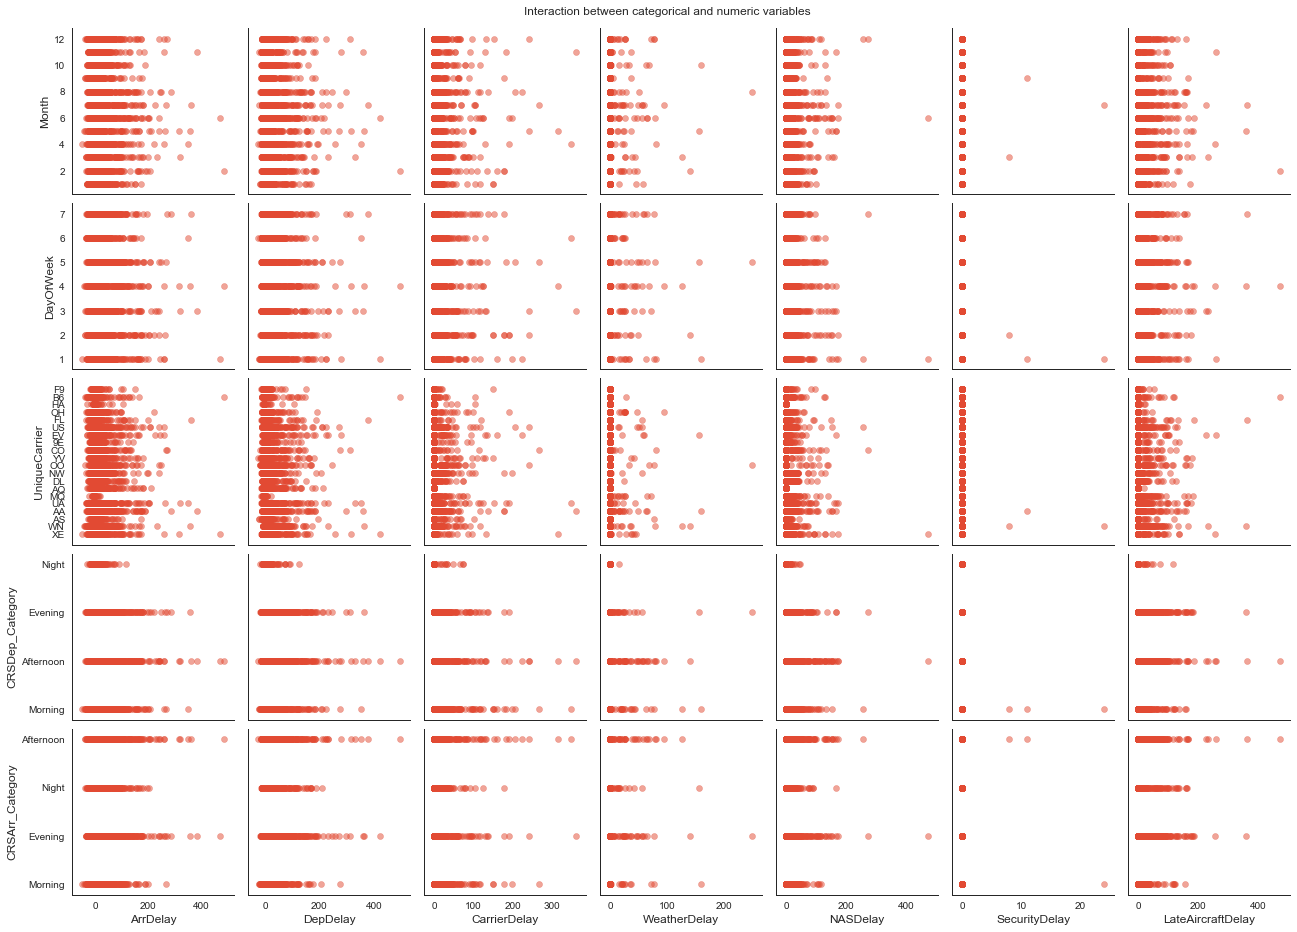

In [37]:
g = sb.PairGrid(data=sample_delay,x_vars=['ArrDelay','DepDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay'],y_vars=['Month','DayOfWeek','UniqueCarrier','CRSDep_Category','CRSArr_Category'])
g.map(plt.scatter, alpha=0.5)
g.fig.suptitle('Interaction between categorical and numeric variables', y=1.02);

By looking at the interaction between categorical and numeric variables, I do see the difference within each categorical variable and the power of each numeric variable, for instance security is confirmed to be relatively weak as cause of delay from a total perspective. Especially, the pattern between CRSDep_category and LateAircraftDelay is interesting, it seems LateAircraftDelay has the biggest impact in the evening.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Firstly when I looked at all numeric variables, I found the 2 targeted features are actually highly related, it can also be observed from their impact on other variables. <br>
With regards to those numerica variables, namely the casues of delay such as weather, NAS, security, their relationship to arrival delay and departure delay actually imply which consequence they are more likely cause, for instance weather are similarly likely to cause departure delay and arrival delay. <br>
> Secondly, with regards to those categorical variables, I can already see such as June July and Auguest turn to have high delay time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As for not key features, LateAircraftDelay could have interesting interaction with CRSDep_Category.

## Multi Bivariate Exploration

## Departure/arrival delay rate and average delay time by month

In [38]:
# delay rate plot
def delay_rate(x, labels):
    by_x = df.groupby([x], as_index=False)[['ArrDelay_cat','DepDelay_cat']].mean()
    melt_x = by_x.melt(id_vars=x, value_vars=['ArrDelay_cat','DepDelay_cat'],var_name='delay_cat',value_name='delayrate')
    
    sb.pointplot(data=melt_x, x=x, y='delayrate', hue='delay_cat')
    
    plt.title('Average delay rate (arrival/departure) by {:s}'.format(x))
    plt.ylabel('delay rate')
    plt.xticks(ticks=np.arange(0, by_x.shape[0], 1), labels=labels)
    plt.legend(loc = 0)
    # annotate
    for i in np.arange(0, by_x.shape[0]):
        plt.text(i, by_x['ArrDelay_cat'].iloc[i], '{:.2f}'.format(by_x['ArrDelay_cat'].iloc[i]))
        plt.text(i, by_x['DepDelay_cat'].iloc[i], '{:.2f}'.format(by_x['DepDelay_cat'].iloc[i]))

In [39]:
# average delay time plot
def delay_time(x, labels):
    by_x = df.groupby([x], as_index=False)[['ArrDelay','DepDelay']].mean()
    melt_x = by_x.melt(id_vars=x, value_vars=['ArrDelay','DepDelay'],var_name='delay_cat',value_name='delaytime')
    
    sb.barplot(data=melt_x, x=x, y='delaytime', hue='delay_cat')
    
    plt.title('Average delay time (arrival/departure) by {:s}'.format(x))
    plt.ylabel('delay time (minute)')
    plt.xticks(ticks=np.arange(0, by_x.shape[0], 1), labels=labels)
    plt.legend(loc = 0)

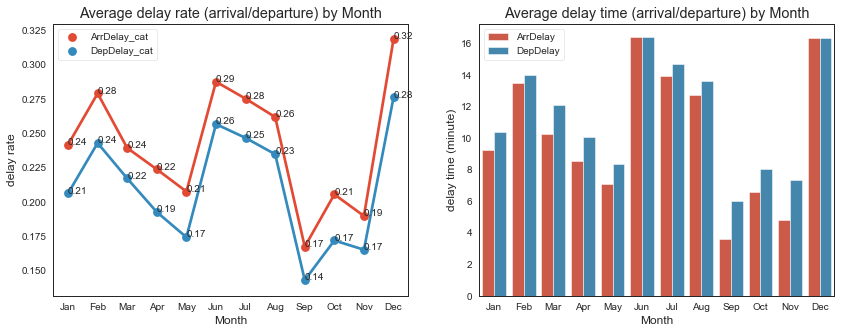

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
delay_rate('Month', month)
plt.subplot(1,2,2)
delay_time('Month', month)

Above plots compare delay rate and average delay time by month. <br>
On the left side, it seems in terms of both arrival and depature rate, arrival delay is higher than departure delay, and they follow the same pattern throughout the year; Dec is the highest for both delay rates (0.32 for arrival, 0.28 for depature), followed by summer season (Jun, Jul, Aug). <br>
On the right side, departure delay is on average longer than arrival delay, and the average delay time also follows the pattern of delay rate.

## Departure/arrival delay rate and average delay time by weekday

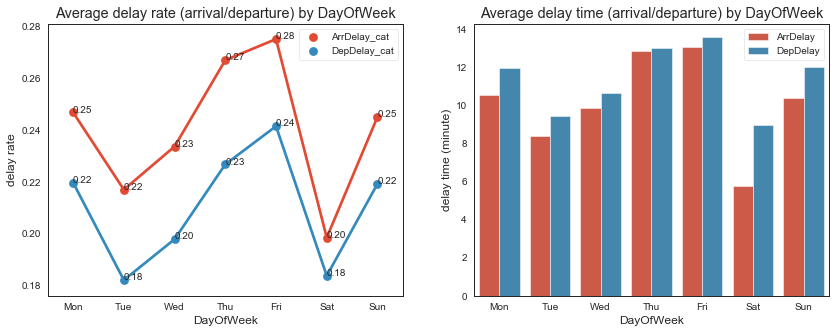

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
delay_rate('DayOfWeek', weekday)
plt.subplot(1,2,2)
delay_time('DayOfWeek', weekday)

- For day of week, overall arrival delay rate is higher than departure rate, Tuesday and Saturday have the shortest delay rate (depature 0.18 and 0.19, arrival 0.21 and 0.20), Friday has the highest delay rate.
- In terms of average delay time, Friday has the longest delay time, then Saturday has the shortest delay. Interestingly, Saturday also has the biggest delta between arrival delay and depature delay and same with month, as for average delay time, arrival delay is shorter than departure delay.

## Departure/arrival delay rate and average delay time by carrier

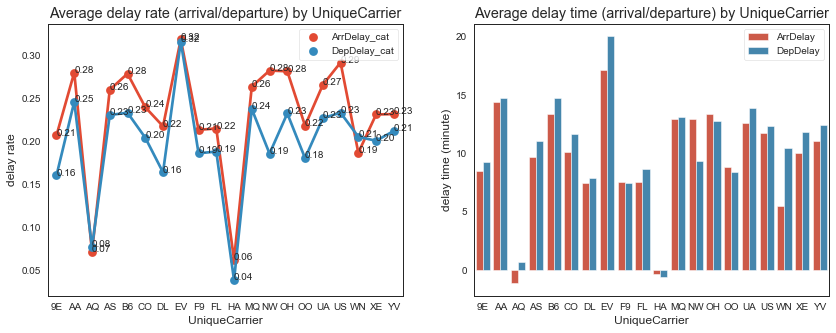

In [42]:
carrier = df.groupby(['UniqueCarrier'])[['ArrDelay_cat','DepDelay_cat']].mean().index
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
delay_rate('UniqueCarrier', carrier)
plt.subplot(1,2,2)
delay_time('UniqueCarrier', carrier)

- For different carriers, overall arrival delay rate is higher than departure rate for each carrier except for WN, there's a swap. HA and AQ have the lowest delay rate (~0.05 and 0.07),EV has the highest (0.32).
- In terms of average delay time, EV has the longest delay time as well as the biggest delta between arrival delay and depature delay, then AQ and HA even have negative delay time, meaning flights in these 2 airports usually leave earlier than scheduled. Overall, departure delay on average is longer than arrival delay.
- Considering the distribution of number of flights in each airport, it seems carriers that own most flights also have high delay rate (except for EV), probably there's a relationship between delay rate and number of number of flights.

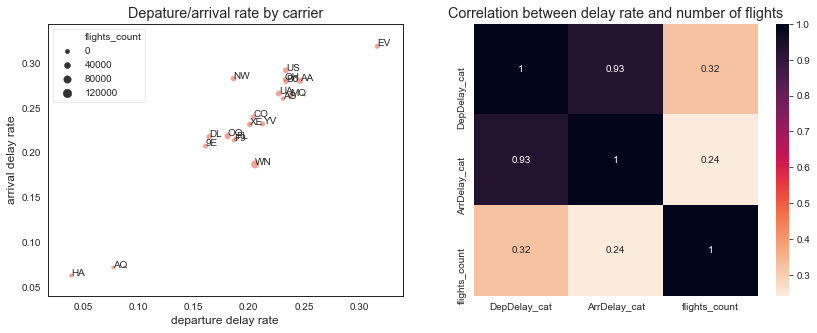

In [43]:
# construct dataset
by_df = df.groupby(['UniqueCarrier'], as_index=False).agg({'DepDelay_cat': 'mean', 'ArrDelay_cat':'mean', 'FlightNum':'count'})
by_df.rename(columns={'FlightNum':'flights_count'}, inplace=True)
# size of marker
size = [n**2 for n in by_df['flights_count']]
plt.figure(figsize=(14,5))
# visualize
plt.subplot(1,2,1)
sb.scatterplot(data=by_df, x='DepDelay_cat', y='ArrDelay_cat', size='flights_count', x_jitter=0.02, alpha=0.5)
plt.title('Depature/arrival rate by carrier')
plt.xlabel('departure delay rate')
plt.ylabel('arrival delay rate')

# annotate
for i,text in enumerate(by_df['UniqueCarrier']):
    plt.annotate(text,(by_df['DepDelay_cat'].iloc[i], by_df['ArrDelay_cat'].iloc[i]))
    
plt.subplot(1,2,2)
sb.heatmap(by_df.corr(), cmap='rocket_r' ,annot=True)
plt.title('Correlation between delay rate and number of flights');

Briefly looked at relationship between number of flights and delay rate, the top biggest carrier are WN, AA, OO, however they don't seem to have the highest delay rate; On the right side, it also confirms that there is a weak relationship between number of flights and delay rate.

## Departure/arrival delay rate and average delay time by scheduled departure time

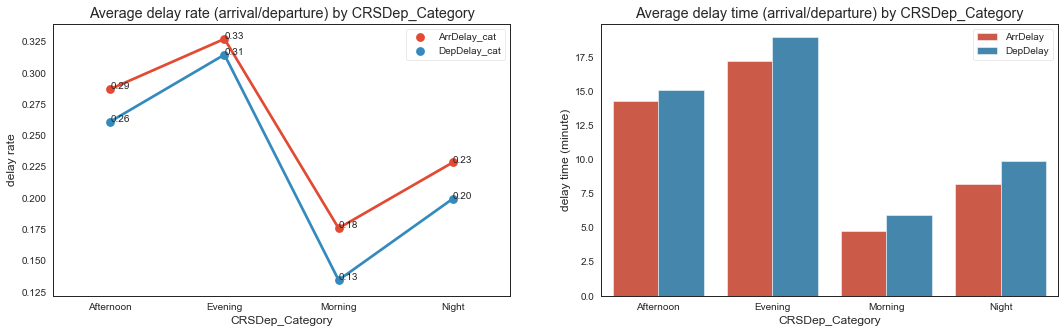

In [44]:
CRSD = df.groupby(['CRSDep_Category'])[['ArrDelay_cat','DepDelay_cat']].mean().index
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
delay_rate('CRSDep_Category', CRSD)
plt.subplot(1,2,2)
delay_time('CRSDep_Category', CRSD)

- For scheduled depature time, afternoon and morning have the longest delay and highest delay rate, evening has the lowest delay rate as well as delay time.

## Departure/arrival delay rate and average delay time by scheduled arrival time

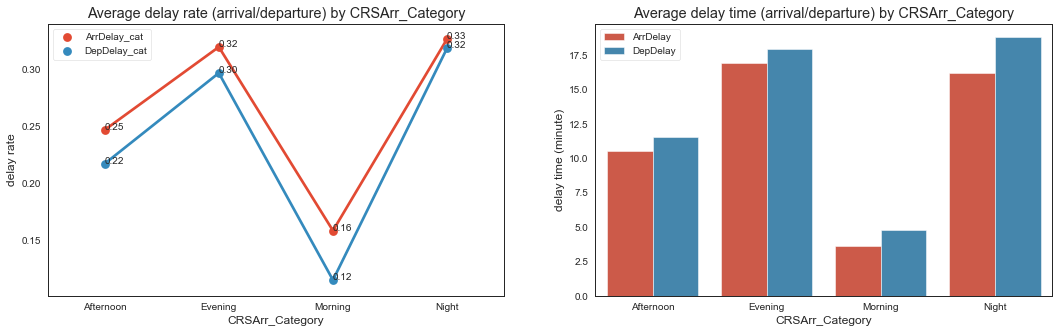

In [45]:
CRSA = df.groupby(['CRSArr_Category'])[['ArrDelay_cat','DepDelay_cat']].mean().index
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
delay_rate('CRSArr_Category', CRSA)
plt.subplot(1,2,2)
delay_time('CRSArr_Category', CRSA)

- For scheduled arrival time, afternoon and morning have highest delay rate, evening has the lowest delay rate as well as delay time, however night has the longest delay time.

## Departure/arrival delay rate and average delay time by top 10 origin/dest
I would also take a look of the top 10 cities as origin and dest in terms of delay rate

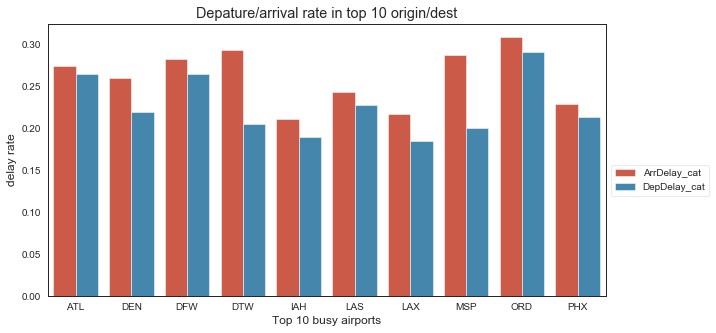

In [46]:
# calculate delay rate per city
top10 = list(df['Origin'].value_counts(ascending=False).head(10).index)
by_df = df[df['Origin'].isin(top10)].groupby(['Origin'], as_index=False)[['DepDelay_cat', 'ArrDelay_cat']].mean()
melt_df = by_df.melt(id_vars='Origin', value_vars=['ArrDelay_cat','DepDelay_cat'],var_name='delay_cat',value_name='delayrate')
# visualization
plt.figure(figsize=(10,5))
sb.barplot(data=melt_df, x='Origin', y='delayrate', hue='delay_cat')
plt.title('Depature/arrival rate in top 10 origin/dest')
plt.xlabel('Top 10 busy airports')
plt.ylabel('delay rate')
plt.legend(loc=0, bbox_to_anchor = (1, 0.5));

Plot above shows that among the top 10 airports that previously observed, the departure delay rate and arrival delay rate are both different for each airports. However for both departure and arrival delay rate, CRD has the highest (around 0.3), DTW and MSP have the biggest delta in arrival and departure delay rate. Overall, arrival delay rate is higher than departure delay rate, which is the same with previous observations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> To look into further in categorical features, I investigated on each individual categorical variables, , plots are created based on 2 indexes - delay rate and average delay time. The pattern for both of them are similar, yet usually arrival delay and departure delay swap with each other in order, meaning usually arrival delay rate is higher than departure delay rate, while depature delay time is on average longer than arrival delay time. <br>

### Were there any interesting or surprising interactions between features?

> I've also investigated on number of flights owned by different carriers and their delay rate, however there's no strong

## Take away:
- In 2007, 27.8% of flights are delayed, late aircraft delay is the biggest reason.
- 2.15% of flights are cancelled, carrier control is the biggest reason.
- Carrier delay is more related to arrival delay; Weather delay/security delay/late aircraft delay is equally related to both arrival delay and departure delay; NASDelay is more related to arrival delay.
- Summer turn to have higher delay rate, in terms of weekday, Thursday and Friday have higher delay rate; In terms of time range, afternoon and evening turn to have higher delay rate.